## DATA SETUP

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import yt
import numpy as np
import matplotlib.pyplot as plt

from setup import data_setup
from gallifrey.utilities.math import calculate_pca
from gallifrey.particles import rotated_dataset

In [3]:
snapshot = 127
resolution = 4096
sim_id = "09_18"

In [4]:
ds, mw, stellar_model, imf, planet_model = data_setup(snapshot, resolution, sim_id)


      DETECTED LOCAL MACHINE: Test snapshot loaded.

yt : [INFO     ] 2023-06-15 12:20:59,059 Calculating time from 1.000e+00 to be 4.318e+17 seconds
yt : [INFO     ] 2023-06-15 12:20:59,125 Parameters: current_time              = 4.318436660023809e+17 s
yt : [INFO     ] 2023-06-15 12:20:59,126 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-06-15 12:20:59,127 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-06-15 12:20:59,128 Parameters: domain_right_edge         = [100. 100. 100.]
yt : [INFO     ] 2023-06-15 12:20:59,128 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-06-15 12:20:59,129 Parameters: current_redshift          = 4.440892098500626e-16
yt : [INFO     ] 2023-06-15 12:20:59,129 Parameters: omega_lambda              = 0.682
yt : [INFO     ] 2023-06-15 12:20:59,130 Parameters: omega_matter              = 0.318
yt : [INFO     ] 2023-06-15 12:20:59,130 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 202

## PLOT SETUP

In [5]:
from planet_maps import plot_maps
from planet_1dprofiles import plot_1dprofiles
from planet_2dprofiles import plot_2dprofiles

In [6]:
def _mass_weighted_planets(field, data):
    return data["stars","planets"]/data["stars","Masses"]
ds.add_field(("stars", "mass_weighted_planets"), function=_mass_weighted_planets, sampling_type="local", units="1/Msun")

def _star_weighted_planets(field, data):
    return data["stars","planets"]/data["stars","main_sequence_stars"]
ds.add_field(("stars", "star_weighted_planets"), function=_star_weighted_planets, sampling_type="local", units="")

## CREATE DATA SOURCE

In [7]:
data_source = mw.sphere(radius=(25,"kpc"))

In [8]:
normal_vector = calculate_pca(mw.sphere(radius=(10,"kpc"))["stars","Coordinates"]).components_[-1]
rotated_data = rotated_dataset(data_source, mw.centre(), normal_vector, [('stars','planets'), ('stars','mass_weighted_planets'), ("stars","star_weighted_planets")])

yt : [INFO     ] 2023-06-15 12:21:02,364 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-06-15 12:21:02,365 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-06-15 12:21:02,366 Parameters: domain_left_edge          = [-24.92271284 -24.92271284 -24.92271284]
yt : [INFO     ] 2023-06-15 12:21:02,367 Parameters: domain_right_edge         = [24.8048826 24.8048826 24.8048826]
yt : [INFO     ] 2023-06-15 12:21:02,367 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-06-15 12:21:02,370 Allocating for 3.289e+05 particles


In [9]:
disk_data = rotated_dataset(mw.disk(radius=(25,"kpc"), height=(0.5,"kpc"), normal=normal_vector), 
                            mw.centre(), normal_vector, [('stars','planets'), ('stars','mass_weighted_planets'), ("stars","star_weighted_planets"), ("stars","main_sequence_stars")])

yt : [INFO     ] 2023-06-15 12:21:07,882 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-06-15 12:21:07,882 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-06-15 12:21:07,883 Parameters: domain_left_edge          = [-24.47325354 -24.47325354 -24.47325354]
yt : [INFO     ] 2023-06-15 12:21:07,884 Parameters: domain_right_edge         = [24.6459193 24.6459193 24.6459193]
yt : [INFO     ] 2023-06-15 12:21:07,884 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-06-15 12:21:07,887 Allocating for 1.300e+05 particles


## FACE-ON MAPS

yt : [INFO     ] 2023-06-15 12:21:08,060 xlim = -21.058915 20.941085
yt : [INFO     ] 2023-06-15 12:21:08,061 ylim = -21.058915 20.941085
yt : [INFO     ] 2023-06-15 12:21:08,061 xlim = -21.058915 20.941085
yt : [INFO     ] 2023-06-15 12:21:08,062 ylim = -21.058915 20.941085
yt : [INFO     ] 2023-06-15 12:21:08,064 Splatting (('stars', 'planets')) onto a 800 by 800 mesh using method 'cic'



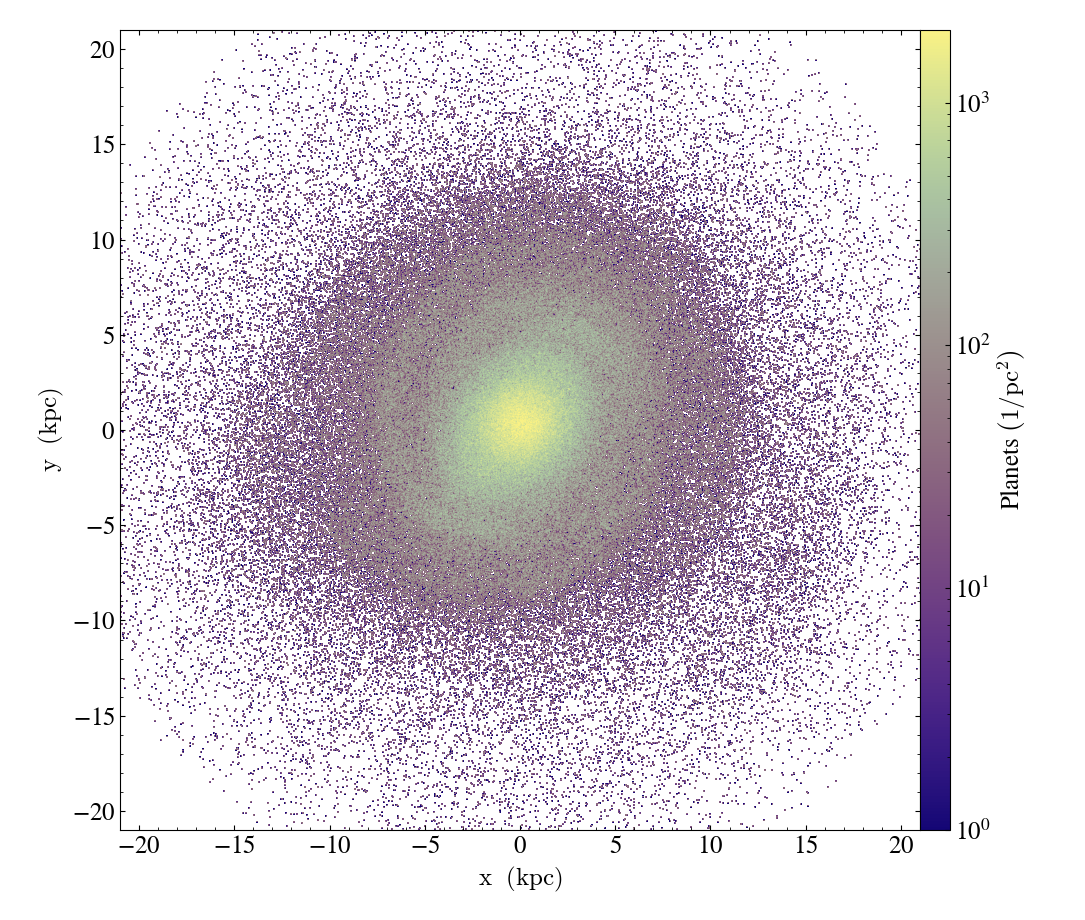

yt : [INFO     ] 2023-06-15 12:21:09,158 xlim = -21.058915 20.941085
yt : [INFO     ] 2023-06-15 12:21:09,159 ylim = -21.058915 20.941085
yt : [INFO     ] 2023-06-15 12:21:09,160 xlim = -21.058915 20.941085
yt : [INFO     ] 2023-06-15 12:21:09,161 ylim = -21.058915 20.941085
yt : [INFO     ] 2023-06-15 12:21:09,162 Splatting (('stars', 'star_weighted_planets')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-06-15 12:21:09,345 Splatting (('stars', 'mass_weighted_planets')) onto a 800 by 800 mesh using method 'cic'



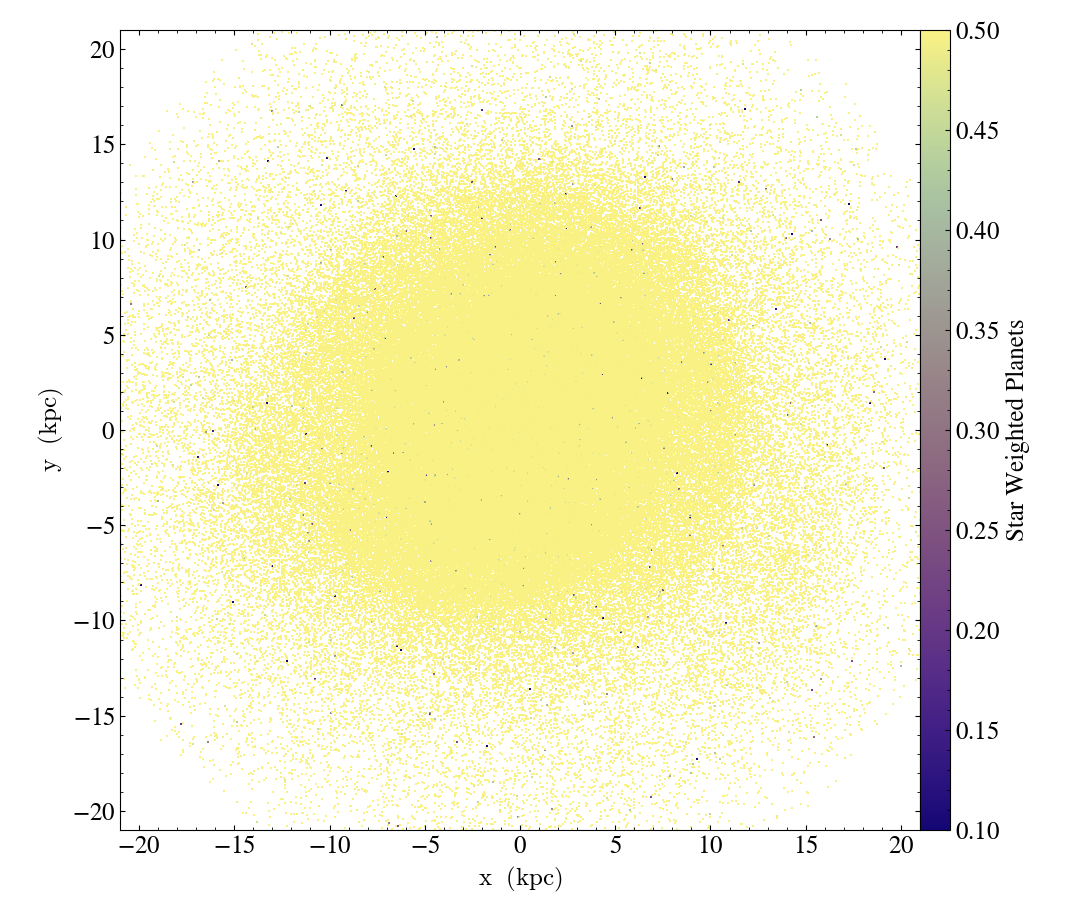
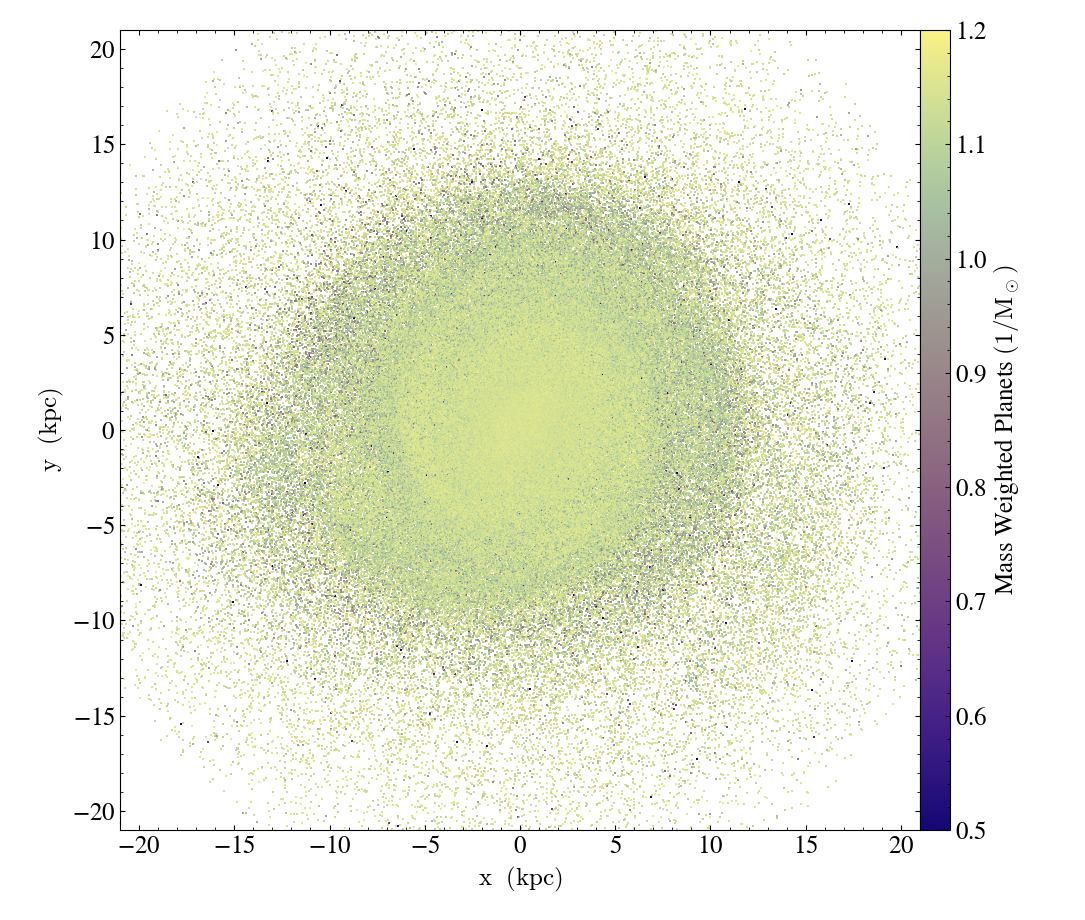

In [10]:
zplot, zplots = plot_maps(rotated_data, axis='z')

## SIDE-ON MAPS

yt : [INFO     ] 2023-06-15 12:21:10,266 xlim = -21.058915 20.941085
yt : [INFO     ] 2023-06-15 12:21:10,266 ylim = -21.058915 20.941085
yt : [INFO     ] 2023-06-15 12:21:10,267 xlim = -21.058915 20.941085
yt : [INFO     ] 2023-06-15 12:21:10,268 ylim = -21.058915 20.941085
yt : [INFO     ] 2023-06-15 12:21:10,269 Splatting (('stars', 'planets')) onto a 800 by 800 mesh using method 'cic'



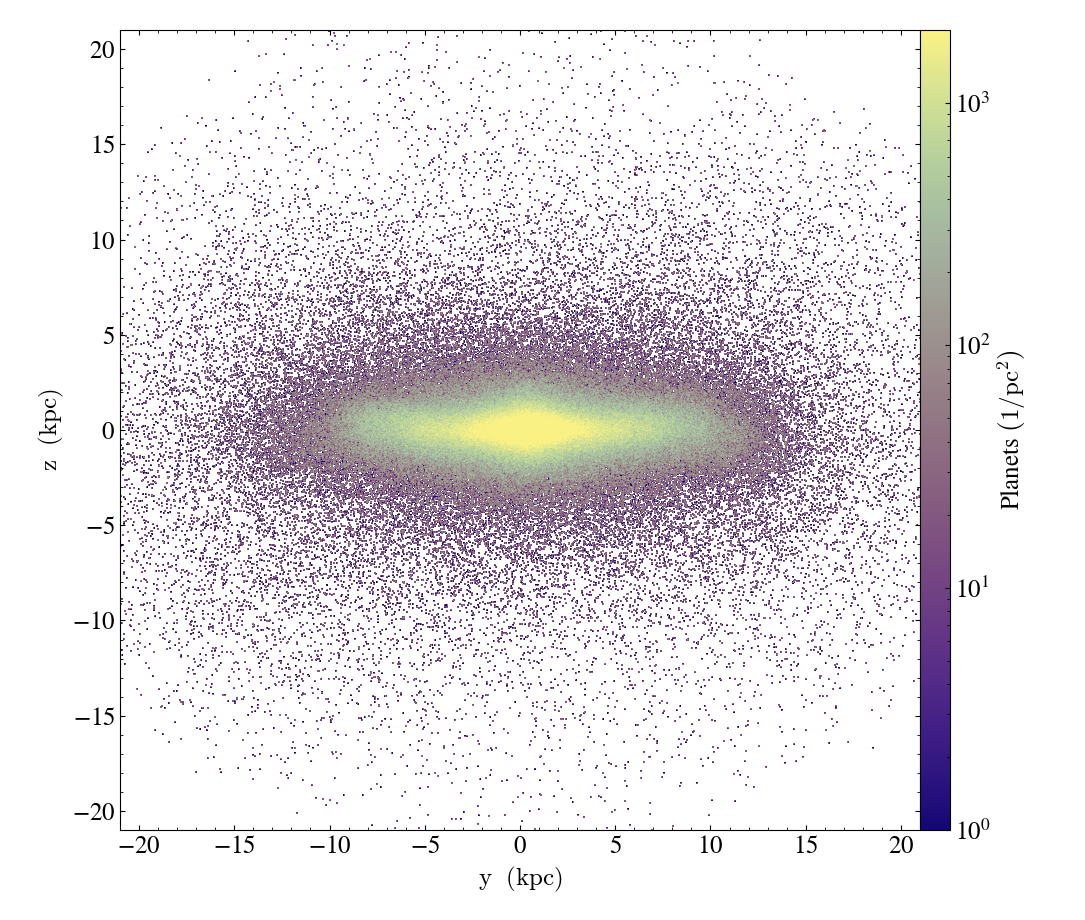

yt : [INFO     ] 2023-06-15 12:21:10,995 xlim = -21.058915 20.941085
yt : [INFO     ] 2023-06-15 12:21:10,996 ylim = -21.058915 20.941085
yt : [INFO     ] 2023-06-15 12:21:10,996 xlim = -21.058915 20.941085
yt : [INFO     ] 2023-06-15 12:21:10,996 ylim = -21.058915 20.941085
yt : [INFO     ] 2023-06-15 12:21:10,998 Splatting (('stars', 'star_weighted_planets')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-06-15 12:21:11,167 Splatting (('stars', 'mass_weighted_planets')) onto a 800 by 800 mesh using method 'cic'



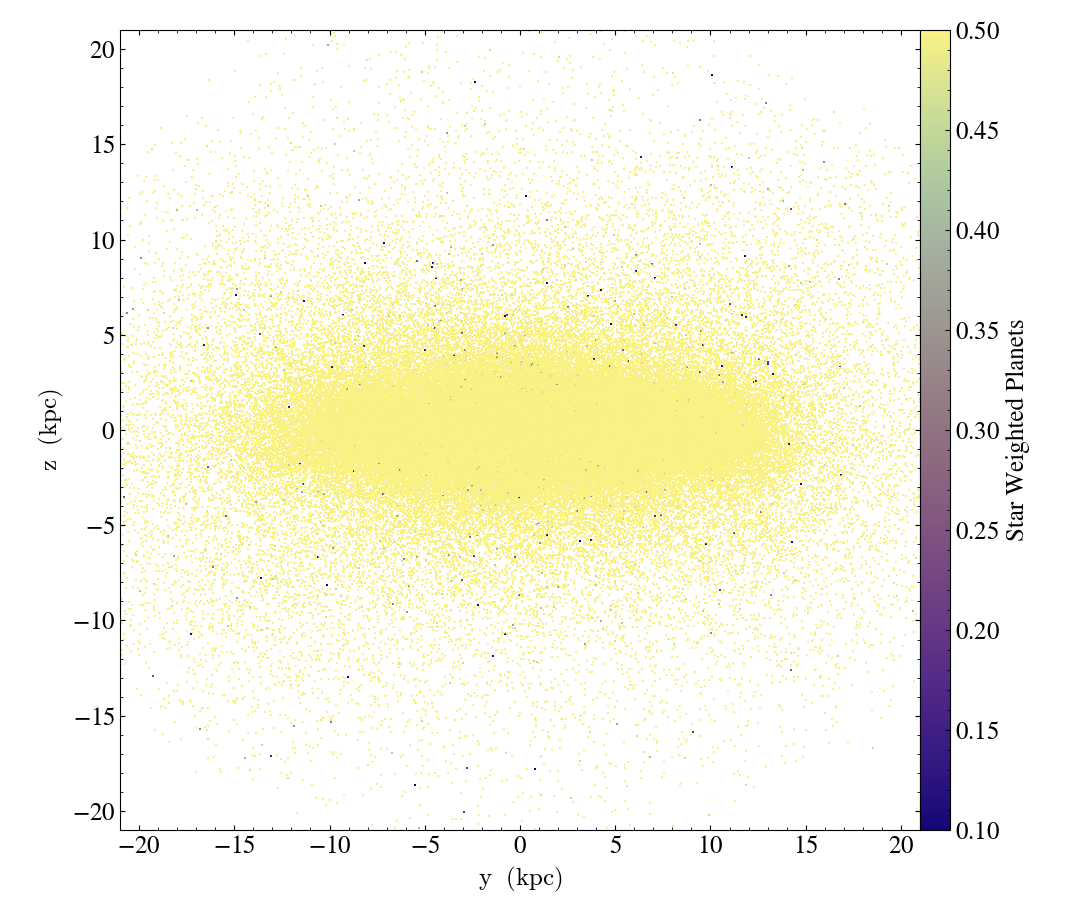
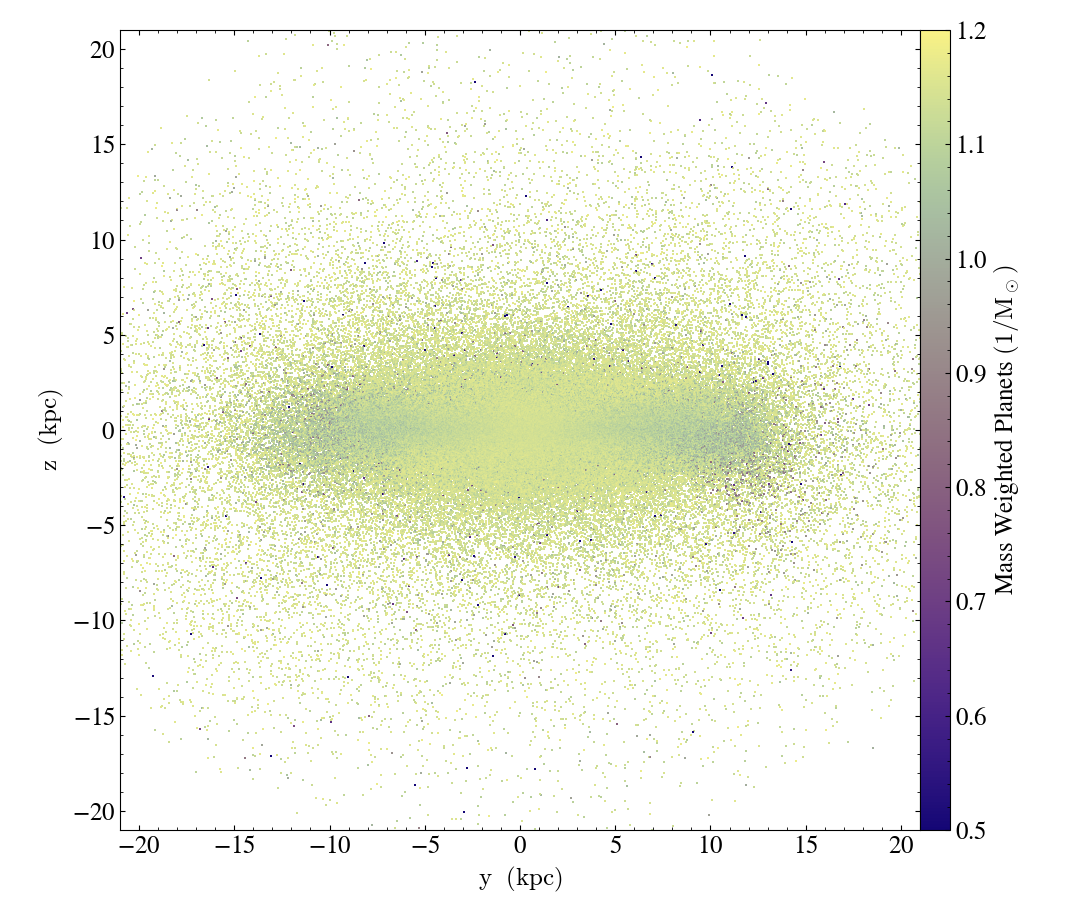

In [11]:
yplot, yplots = plot_maps(rotated_data, axis='x')

## 1D Profiles

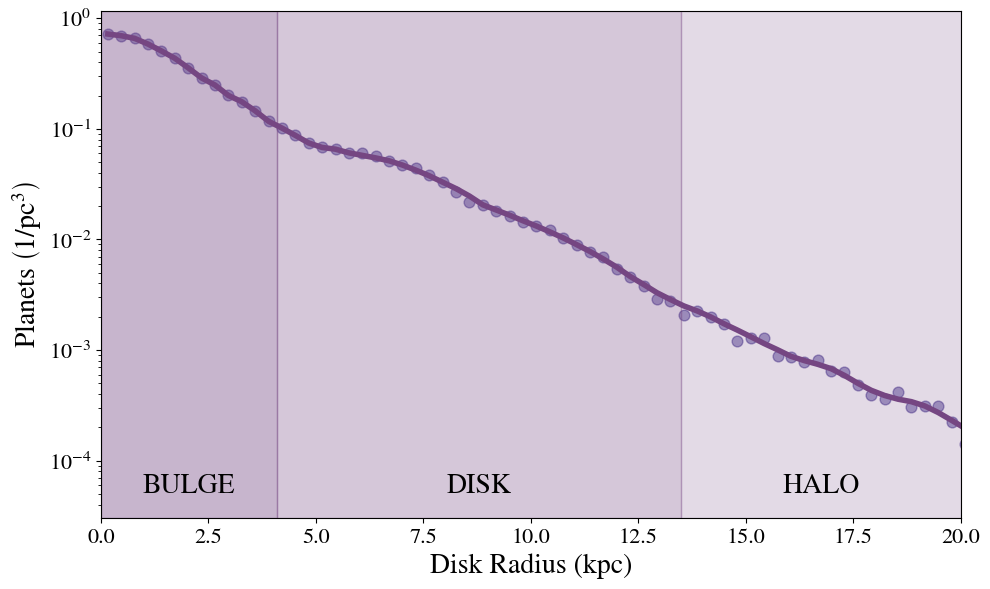

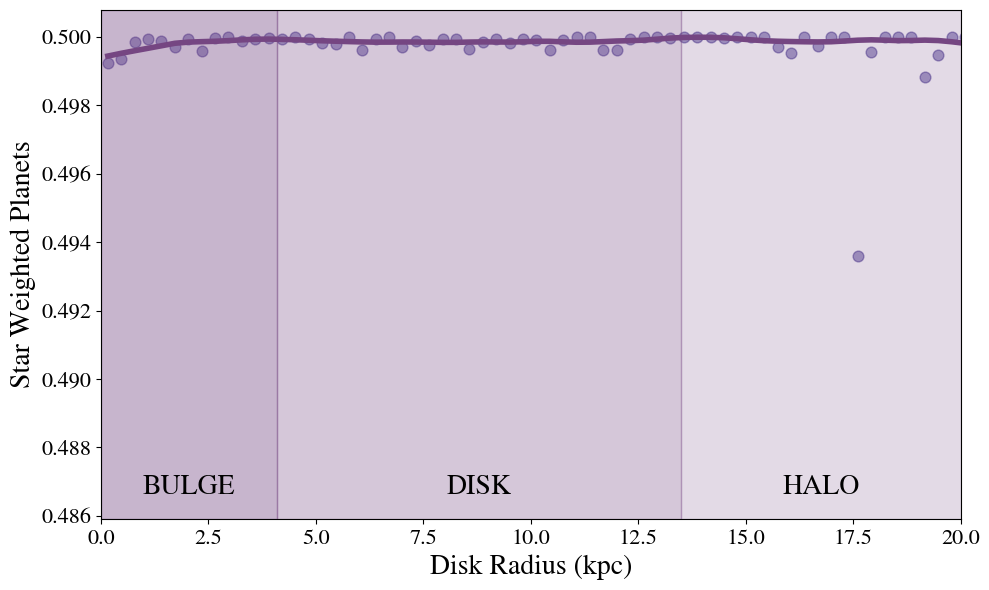

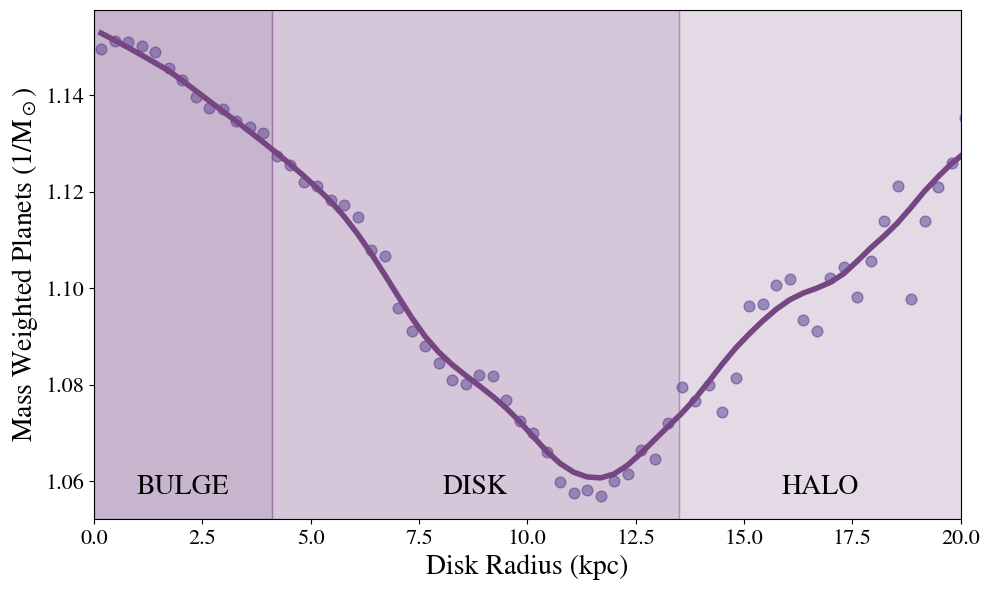

In [12]:
figs, axes = plot_1dprofiles(disk_data.sphere([0,0,0], 25), halo=mw, disk_height=ds.quan(0.5,"kpc"))

## 2D Profiles


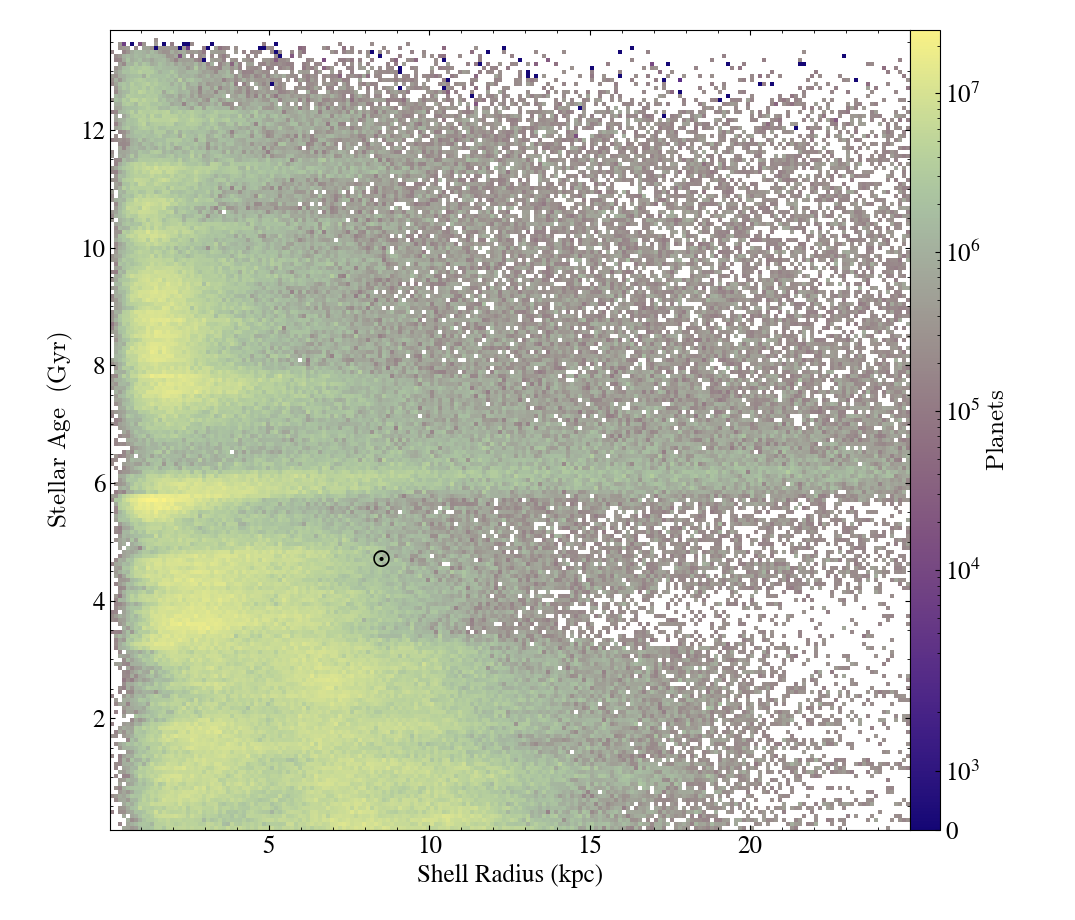


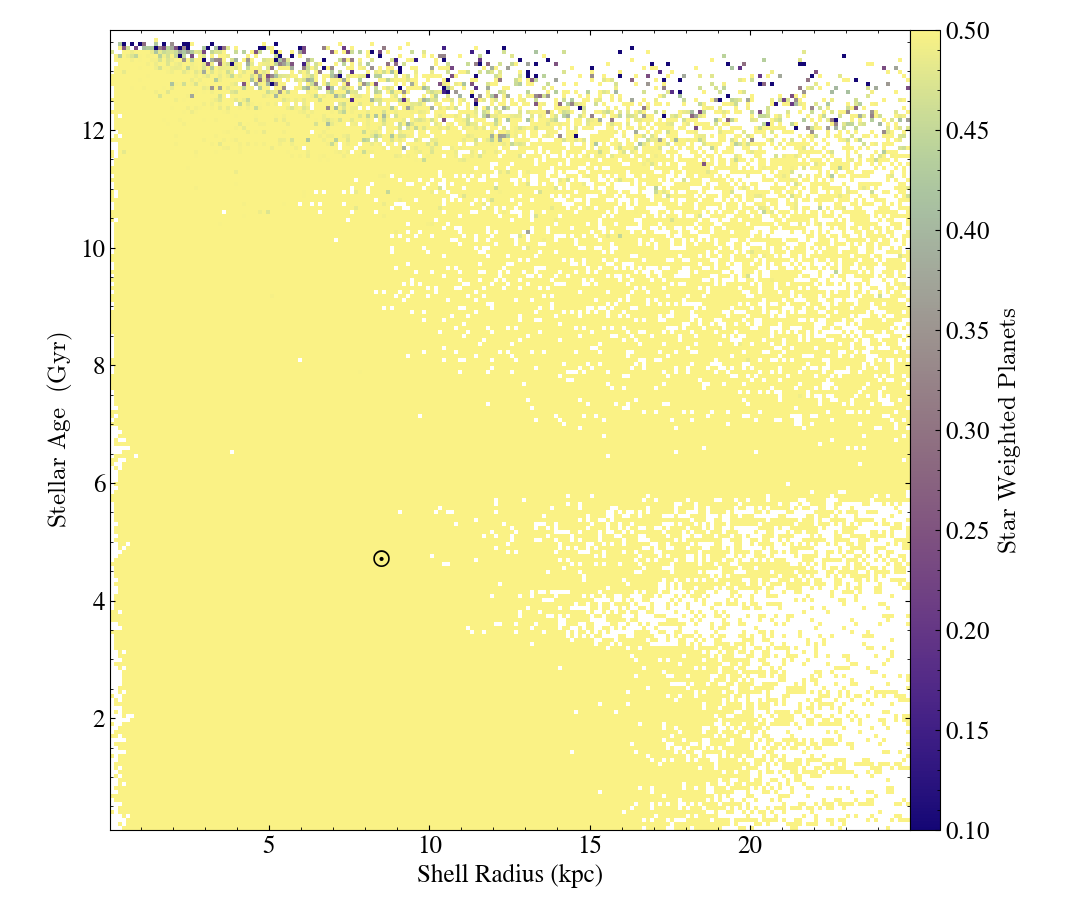


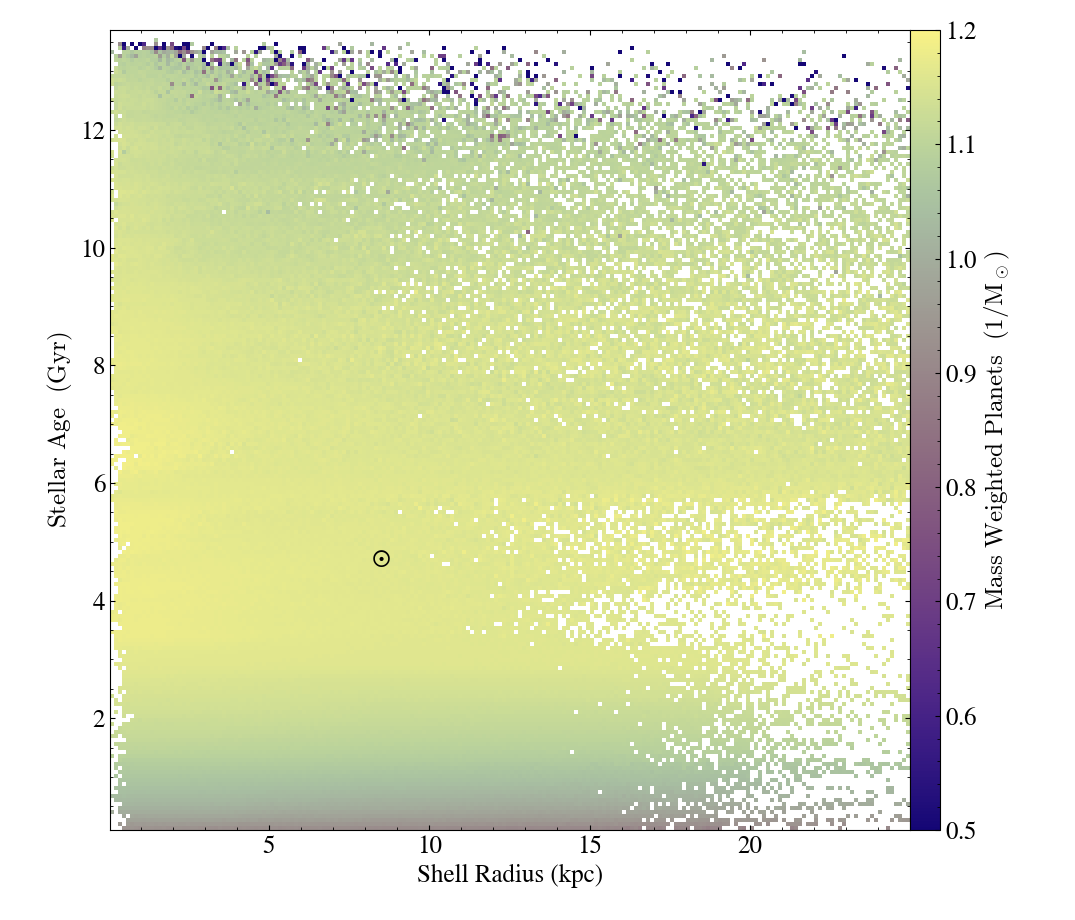

In [13]:
age_plots = plot_2dprofiles(data_source, "stellar_age")


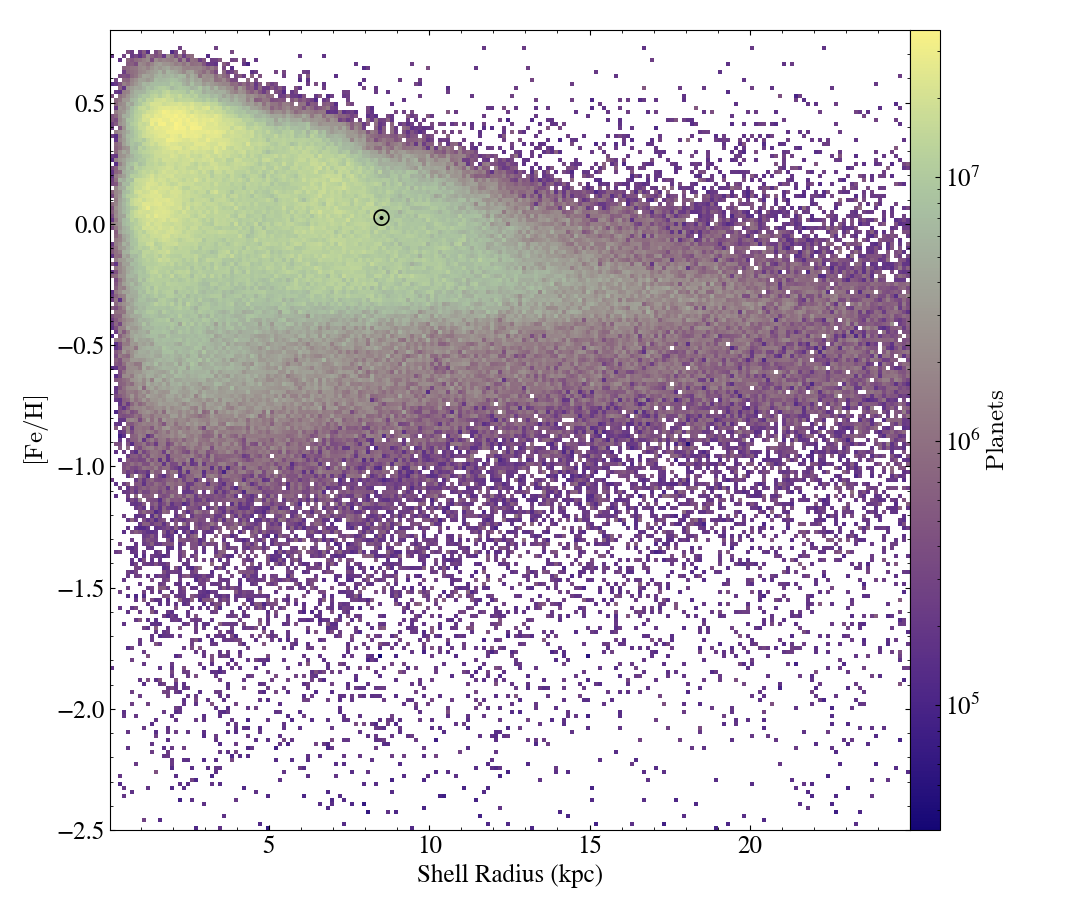


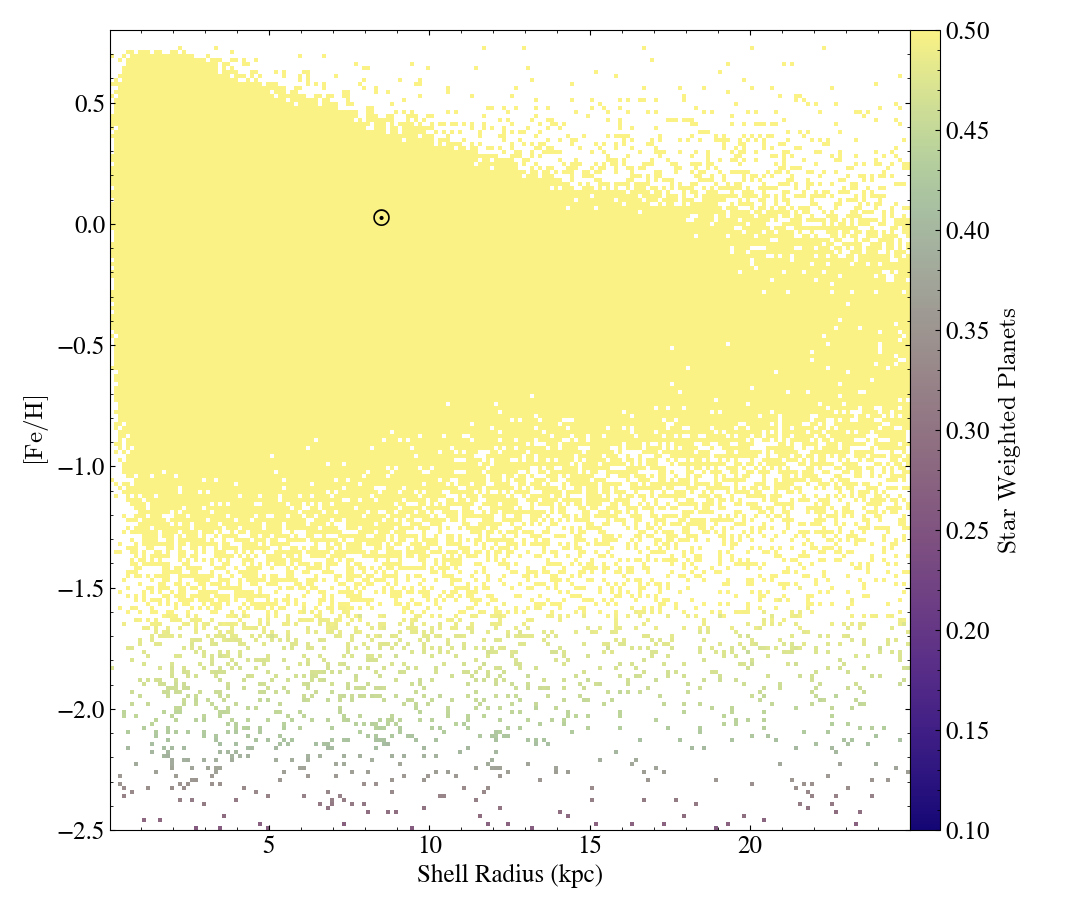


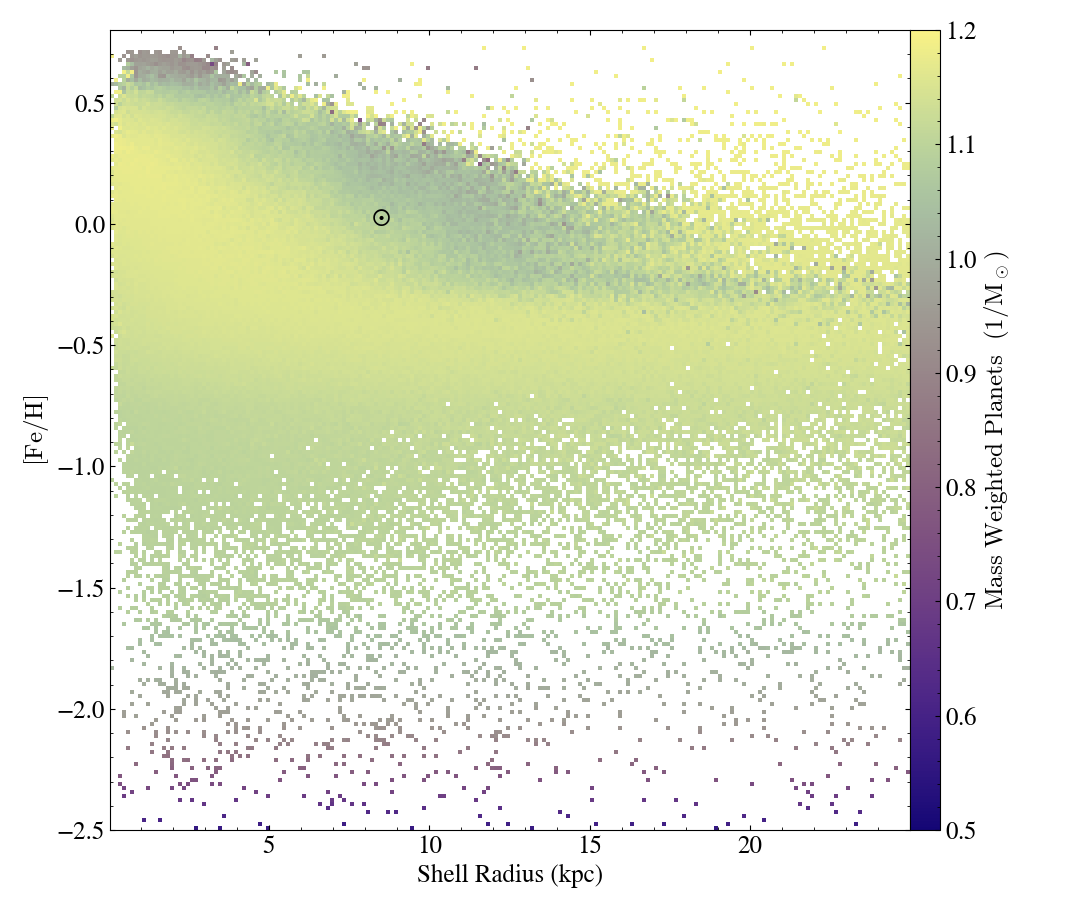

In [14]:
fe_plots = plot_2dprofiles(data_source, "[Fe/H]")